###Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###Loading the data and validating

In [ ]:
#Loading the raw dataset
raw_tweets_data= pd.read_csv('./raw_data/Corona_NLP_test.csv')

In [ ]:
raw_tweets_data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [ ]:
#Checking all available columns with in the dataset
raw_tweets_data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
#validating if there are any null values data in 'originalTweet' column

raw_tweets_data['OriginalTweet'].isna().sum()

0

###Preprocessing the data

In [ ]:
#As the analysis needs to be performed on 'OriginalTweet' data,preprocessing the tweets data to transform into an analysis ready data.

OriginalTweetData = raw_tweets_data['OriginalTweet']
OriginalTweetData 

0       TRENDING: New Yorkers encounter empty supermar...
1       When I couldn't find hand sanitizer at Fred Me...
2       Find out how you can protect yourself and love...
3       #Panic buying hits #NewYork City as anxious sh...
4       #toiletpaper #dunnypaper #coronavirus #coronav...
                              ...                        
3793    Meanwhile In A Supermarket in Israel -- People...
3794    Did you panic buy a lot of non-perishable item...
3795    Asst Prof of Economics @cconces was on @NBCPhi...
3796    Gov need to do somethings instead of biar je r...
3797    I and @ForestandPaper members are committed to...
Name: OriginalTweet, Length: 3798, dtype: object

In [ ]:
#function that performs the preprocessing on tweets data

def preprocess_tweets_data(tweets_data):

    # As a first step removing all the URLs with in the tweet's data
    tweets_data = re.sub(r"http\S+", "", tweets_data)  

    # Then removing the mentions/tags with in the data
    tweets_data = re.sub(r"@\S+", "", tweets_data)     

    # Removing all special characters with in the data
    tweets_data = re.sub(r"[^a-zA-Z0-9\s]", "", tweets_data)  

    # converting the entire data to be in lowercase
    tweets_data = tweets_data.lower()  

    return tweets_data



In [ ]:
#Preprocessing the tweets data 

OriginalTweetData = OriginalTweetData.apply(preprocess_tweets_data)
OriginalTweetData

0       trending new yorkers encounter empty supermark...
1       when i couldnt find hand sanitizer at fred mey...
2       find out how you can protect yourself and love...
3       panic buying hits newyork city as anxious shop...
4       toiletpaper dunnypaper coronavirus coronavirus...
                              ...                        
3793    meanwhile in a supermarket in israel  people d...
3794    did you panic buy a lot of nonperishable items...
3795    asst prof of economics  was on  talking about ...
3796    gov need to do somethings instead of biar je r...
3797    i and  members are committed to the safety of ...
Name: OriginalTweet, Length: 3798, dtype: object

In [ ]:
#After preprocessing, saving the cleaned tweets data seperately to perform further analysis

OriginalTweetData.to_csv("./clean_data/clean_tweets_data", index=False)

###a. Converting  the text corpus into tokens.

In [ ]:
#Loading the clean data

clean_tweets_data = pd.read_csv('./clean_data/clean_tweets_data')
clean_tweets_data

,OriginalTweet
0,trending new yorkers encounter empty supermark...
1,when i couldnt find hand sanitizer at fred mey...
2,find out how you can protect yourself and love...
3,panic buying hits newyork city as anxious shop...
4,toiletpaper dunnypaper coronavirus coronavirus...
...,...
3791,meanwhile in a supermarket in israel people d...
3792,did you panic buy a lot of nonperishable items...
3793,asst prof of economics was on talking about ...
3794,gov need to do somethings instead of biar je r...


In [ ]:
#creating a tokens list
tokens = list()

#converting the entire text corpus into tokens
for tweet in clean_tweets_data['OriginalTweet']:
  tokens+=word_tokenize(tweet)


tokens

['trending',
 'new',
 'yorkers',
 'encounter',
 'empty',
 'supermarket',
 'shelves',
 'pictured',
 'wegmans',
 'in',
 'brooklyn',
 'soldout',
 'online',
 'grocers',
 'foodkick',
 'maxdelivery',
 'as',
 'coronavirusfearing',
 'shoppers',
 'stock',
 'up',
 'when',
 'i',
 'couldnt',
 'find',
 'hand',
 'sanitizer',
 'at',
 'fred',
 'meyer',
 'i',
 'turned',
 'to',
 'amazon',
 'but',
 '11497',
 'for',
 'a',
 '2',
 'pack',
 'of',
 'purellcheck',
 'out',
 'how',
 'coronavirus',
 'concerns',
 'are',
 'driving',
 'up',
 'prices',
 'find',
 'out',
 'how',
 'you',
 'can',
 'protect',
 'yourself',
 'and',
 'loved',
 'ones',
 'from',
 'coronavirus',
 'panic',
 'buying',
 'hits',
 'newyork',
 'city',
 'as',
 'anxious',
 'shoppers',
 'stock',
 'up',
 'on',
 'foodampmedical',
 'supplies',
 'after',
 'healthcare',
 'worker',
 'in',
 'her',
 '30s',
 'becomes',
 'bigapple',
 '1st',
 'confirmed',
 'coronavirus',
 'patient',
 'or',
 'a',
 'bloomberg',
 'staged',
 'event',
 'qanon',
 'qanon2018',
 'qanon202

In [ ]:
#length of tokens list
len(tokens)

120768

### b. Removing of all Stop words in the data

In [ ]:
#getting the list of all stop words
stop_words = set(stopwords.words('english'))

# removing stop words from the list of tokenized vectors
def remove_stopwords(tokens):
    return [token for token in tokens if not token in stop_words]

#filtering all stopwords
filtered_tokens = remove_stopwords(tokens)

filtered_tokens

['trending',
 'new',
 'yorkers',
 'encounter',
 'empty',
 'supermarket',
 'shelves',
 'pictured',
 'wegmans',
 'brooklyn',
 'soldout',
 'online',
 'grocers',
 'foodkick',
 'maxdelivery',
 'coronavirusfearing',
 'shoppers',
 'stock',
 'couldnt',
 'find',
 'hand',
 'sanitizer',
 'fred',
 'meyer',
 'turned',
 'amazon',
 '11497',
 '2',
 'pack',
 'purellcheck',
 'coronavirus',
 'concerns',
 'driving',
 'prices',
 'find',
 'protect',
 'loved',
 'ones',
 'coronavirus',
 'panic',
 'buying',
 'hits',
 'newyork',
 'city',
 'anxious',
 'shoppers',
 'stock',
 'foodampmedical',
 'supplies',
 'healthcare',
 'worker',
 '30s',
 'becomes',
 'bigapple',
 '1st',
 'confirmed',
 'coronavirus',
 'patient',
 'bloomberg',
 'staged',
 'event',
 'qanon',
 'qanon2018',
 'qanon2020',
 'election2020',
 'cdc',
 'toiletpaper',
 'dunnypaper',
 'coronavirus',
 'coronavirusaustralia',
 'coronavirusupdate',
 'covid19',
 '9news',
 'corvid19',
 '7newsmelb',
 'dunnypapergate',
 'costco',
 'one',
 'week',
 'everyone',
 'buy

In [ ]:
#length of filtered tokens after removing the stop words
len(filtered_tokens)

72990

### c. Couting the word frequencies.

In [ ]:
#Getting the frequency of occurance for filtered tokens in the corpus using Counter function
word_frequency = Counter(filtered_tokens)

word_frequency

Counter({'trending': 4,
         'new': 99,
         'yorkers': 3,
         'encounter': 3,
         'empty': 133,
         'supermarket': 514,
         'shelves': 213,
         'pictured': 1,
         'wegmans': 6,
         'brooklyn': 6,
         'soldout': 3,
         'online': 508,
         'grocers': 11,
         'foodkick': 1,
         'maxdelivery': 1,
         'coronavirusfearing': 1,
         'shoppers': 40,
         'stock': 782,
         'couldnt': 14,
         'find': 58,
         'hand': 140,
         'sanitizer': 84,
         'fred': 2,
         'meyer': 2,
         'turned': 4,
         'amazon': 57,
         '11497': 1,
         '2': 148,
         'pack': 14,
         'purellcheck': 1,
         'coronavirus': 1512,
         'concerns': 26,
         'driving': 9,
         'prices': 431,
         'protect': 33,
         'loved': 5,
         'ones': 23,
         'panic': 482,
         'buying': 287,
         'hits': 6,
         'newyork': 5,
         'city': 32,
         '

In [ ]:
#Most common words frequency count
word_frequency.most_common()

[('covid19', 2497),
 ('coronavirus', 1512),
 ('food', 1332),
 ('store', 1008),
 ('grocery', 815),
 ('stock', 782),
 ('people', 774),
 ('amp', 576),
 ('shopping', 523),
 ('supermarket', 514),
 ('online', 508),
 ('panic', 482),
 ('prices', 431),
 ('need', 366),
 ('toilet', 361),
 ('paper', 351),
 ('like', 332),
 ('get', 329),
 ('dont', 300),
 ('buying', 287),
 ('go', 259),
 ('going', 256),
 ('us', 252),
 ('local', 245),
 ('please', 245),
 ('im', 238),
 ('retail', 236),
 ('time', 227),
 ('home', 225),
 ('coronaviruspandemic', 218),
 ('shelves', 213),
 ('buy', 212),
 ('stores', 206),
 ('everyone', 199),
 ('work', 196),
 ('due', 194),
 ('today', 193),
 ('help', 189),
 ('consumer', 186),
 ('covid2019', 178),
 ('demand', 165),
 ('supplies', 163),
 ('coronaoutbreak', 158),
 ('one', 153),
 ('virus', 153),
 ('2', 148),
 ('pandemic', 148),
 ('cant', 144),
 ('19', 144),
 ('stay', 143),
 ('covid', 141),
 ('hand', 140),
 ('water', 138),
 ('even', 137),
 ('empty', 133),
 ('panicbuying', 133),
 ('stil

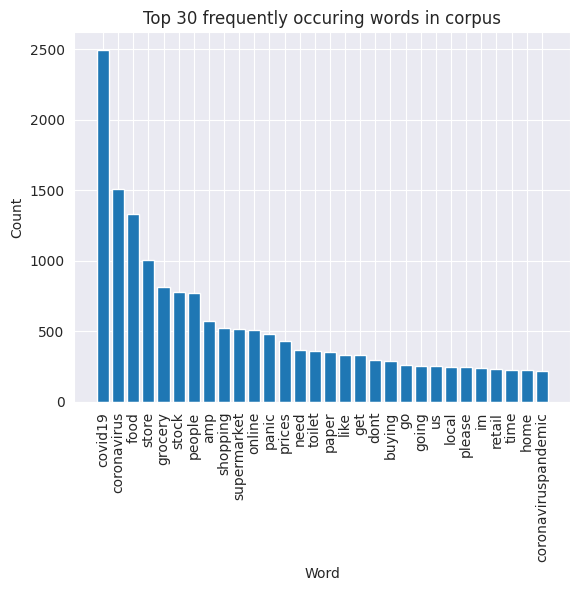

In [ ]:
# filtering the top 30 frequently observed words in the corpus
top_words = word_frequency.most_common(30)


words = [word[0] for word in top_words]
counts = [word[1] for word in top_words]

# create a bar plot of the top 20 words
plt.bar(words, counts)
plt.title('Top 30 frequently occuring words in corpus')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### d. Representing the frequently used words using word cloud

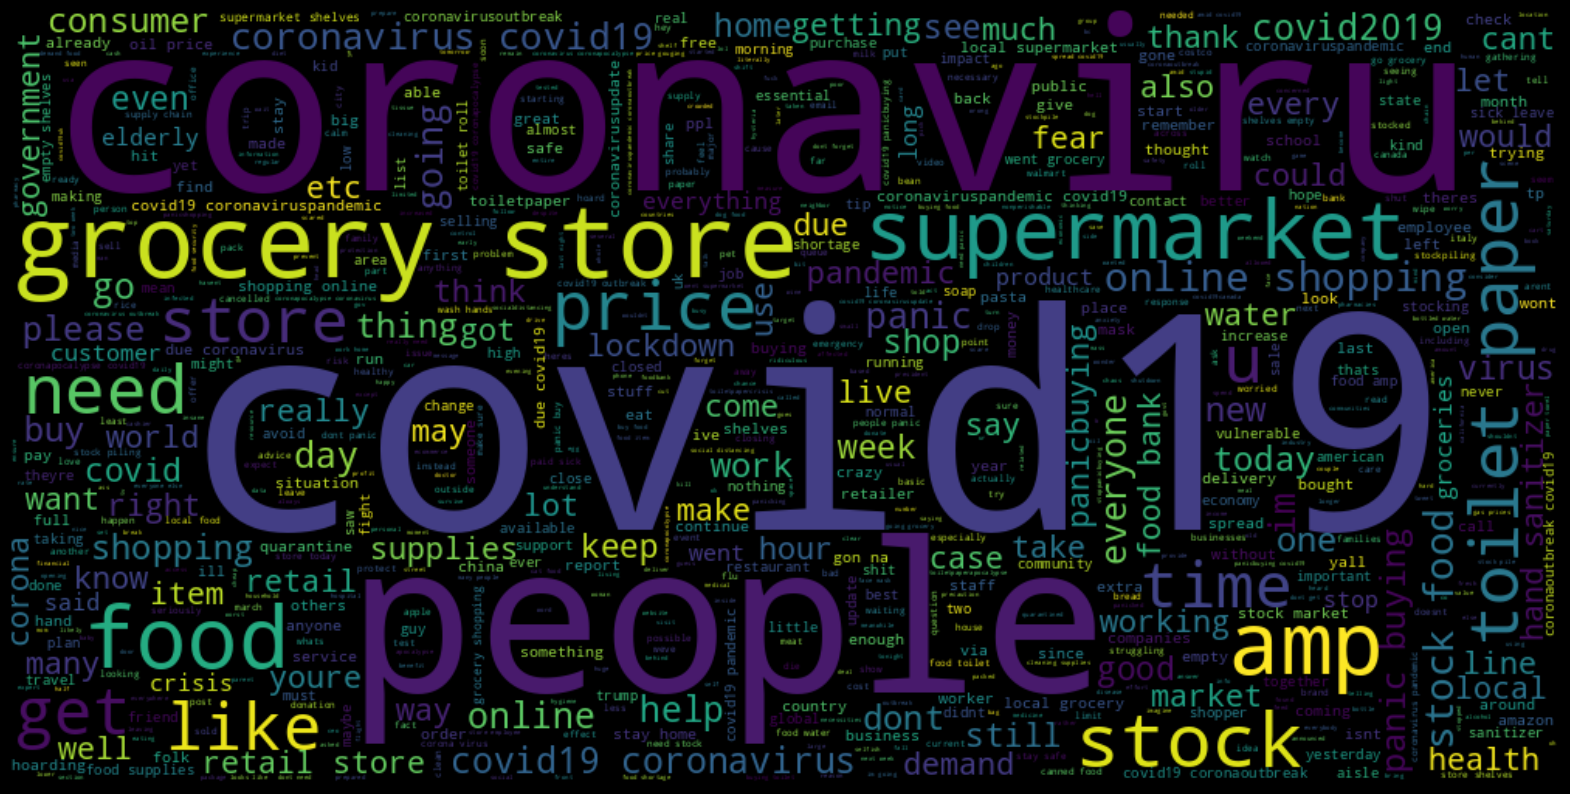

In [ ]:
text = " ".join(filtered_tokens)

wc = WordCloud(max_words=1500, width=1000, height=500,  random_state=21, stopwords=set(stopwords.words('english')))
wc.generate(text)

plt.figure(figsize=(20, 20), facecolor='k')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('./results/wordcloud.png')